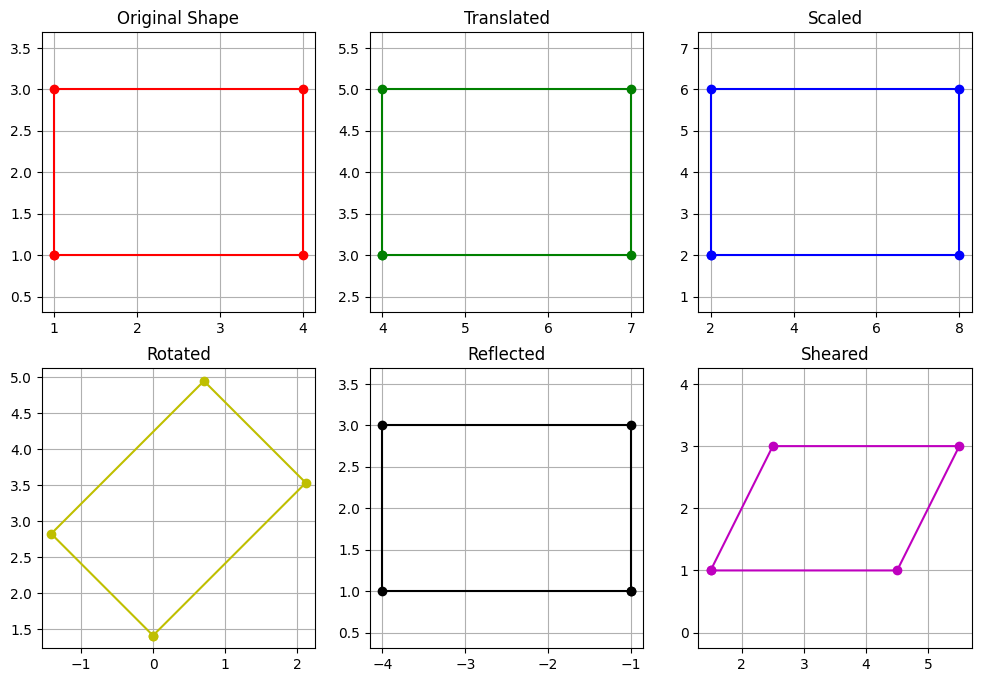

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_shape(points, style='bo-'):
    """ Helper function to plot the shape """
    points = np.concatenate([points, points[:1]], axis=0)
    plt.plot(points[:, 0], points[:, 1], style)
    plt.grid(True)
    plt.axis('equal')

rectangle = np.array([[1, 1], [4, 1], [4, 3], [1, 3]])

plt.figure(figsize=(12, 8))
plt.subplot(231)
plot_shape(rectangle, 'ro-')
plt.title('Original Shape')

T = np.array([[1, 0, 3], [0, 1, 2], [0, 0, 1]])  # Move right by 3 and up by 2
translated = rectangle @ T[:2, :2].T + T[:2, 2]
plt.subplot(232)
plot_shape(translated, 'go-')
plt.title('Translated')

S = np.array([[2, 0, 0], [0, 2, 0], [0, 0, 1]])  # Scale by 2
scaled = rectangle @ S[:2, :2].T
plt.subplot(233)
plot_shape(scaled, 'bo-')
plt.title('Scaled')

angle = np.pi / 4
R = np.array([[np.cos(angle), -np.sin(angle), 0],
              [np.sin(angle),  np.cos(angle), 0],
              [0,             0,             1]])
rotated = rectangle @ R[:2, :2].T
plt.subplot(234)
plot_shape(rotated, 'yo-')
plt.title('Rotated')

Ref = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
reflected = rectangle @ Ref[:2, :2].T
plt.subplot(235)
plot_shape(reflected, 'ko-')
plt.title('Reflected')

Sh = np.array([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]])
sheared = rectangle @ Sh[:2, :2].T
plt.subplot(236)
plot_shape(sheared, 'mo-')
plt.title('Sheared')

plt.show()


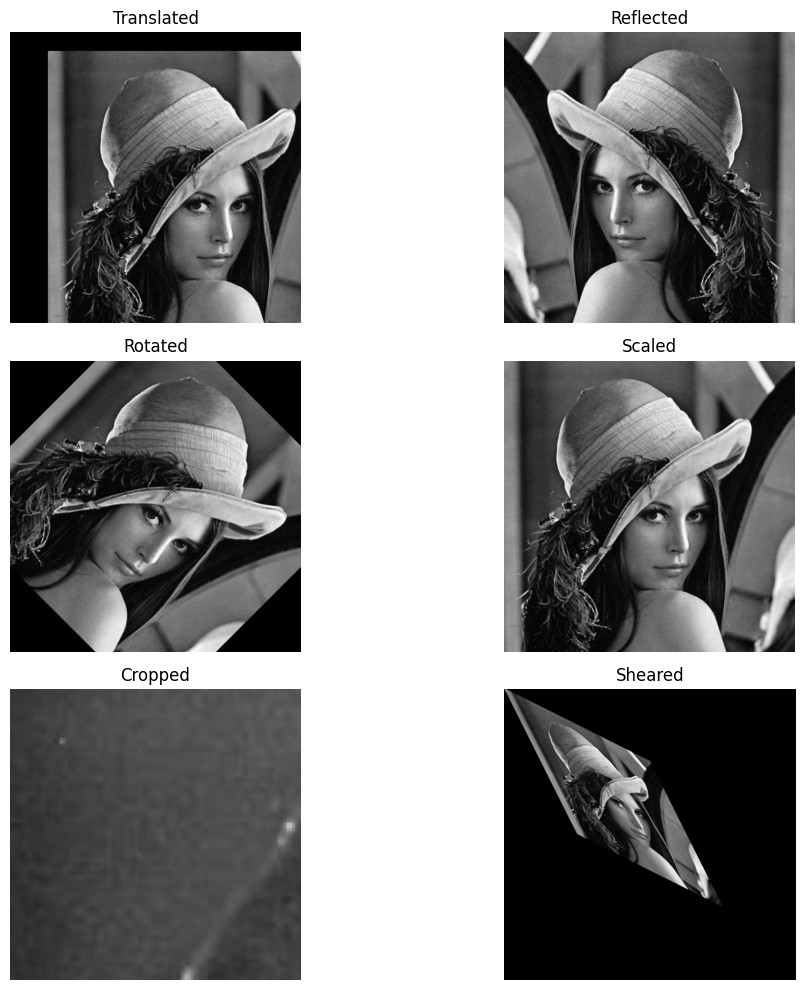

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/image (1).png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def show_image(img, title="Image"):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(12, 10))

M = np.float32([[1, 0, 100], [0, 1, 50]])
translated = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt.subplot(321)
show_image(translated, 'Translated')

reflected = cv2.flip(image, 1)
plt.subplot(322)
show_image(reflected, 'Reflected')

center = (image.shape[1] // 2, image.shape[0] // 2)
angle = -45
scale = 1.0
M = cv2.getRotationMatrix2D(center, angle, scale)
rotated = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt.subplot(323)
show_image(rotated, 'Rotated')

resized = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
plt.subplot(324)
show_image(resized, 'Scaled')

cropped = image[50:150, 100:200]
plt.subplot(325)
show_image(cropped, 'Cropped')

rows, cols, ch = image.shape
M_shear = np.float32([[1, 0.5, 0], [0.5, 1, 0]])
sheared = cv2.warpAffine(image, M_shear, (cols*2, rows*2))
plt.subplot(326)
show_image(sheared, 'Sheared')

plt.tight_layout()
plt.show()
